Import libraries

In [1]:
import requests # library to handle requests

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Folium installed
Libraries imported.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

Create a dataframe from excel

In [3]:
df = pd.read_excel(r'C:\Users\user\Desktop\Taipei_coor.xlsx')

df

,ZIP code,District Name,latitude,longitude,population
0,100,Zhongzheng,25.0421,121.5199,162549
1,103,Datong,25.0627,121.5113,131029
2,104,Zhongshan,25.0792,121.5427,231286
3,105,Songshan,25.0542,121.5639,209689
4,106,Da'an,25.0249,121.5434,312909
5,108,Wanhua,25.0263,121.4970,194314
6,110,Xinyi,25.0409,121.5720,229139
7,111,Shilin,25.0950,121.5246,290682
8,112,Beitou,25.1152,121.5150,257922
9,114,Neihu,25.0689,121.5909,287726


Set variables

In [26]:
CLIENT_ID = 'BZNKCE2FYJIG144QMLVJDSUKCMPLAAQU04OIYNO2PWYJHSDQ' 
CLIENT_SECRET = 'WDB3UH3X4X5PRISK5U32ZUNJUGS1T5KF3DNC1KUYIWAASAQB'
VERSION = '20180604'

In [5]:
dist_latitude = df.loc[0, 'latitude'] # neighborhood latitude value
dist_longitude = df.loc[0, 'longitude'] # neighborhood longitude value

dist_name = df.loc[0, 'District Name'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(dist_name, 
                                                               dist_latitude, 
                                                               dist_longitude))

Latitude and longitude values of Zhongzheng are 25.0421, 121.5199.


Get all the gyms within a 1500m of radius from each district

In [43]:
LIMIT = 100
radius = 1500
search_query = 'gym'
all_gyms = pd.DataFrame()

for x in range(12):
    dist_lat = df.loc[x, 'latitude']
    dist_lng = df.loc[x, 'longitude']
    dist_name = df.loc[x, 'District Name']
    print(dist_name)
    
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            dist_lat,
            dist_lng,
            VERSION,
            search_query,
            radius,
            LIMIT)
    
    results = requests.get(url).json()
    venues = results['response']['venues']
    
    nearby_gyms = json_normalize(venues)
    
    nearby_gyms = nearby_gyms.loc[:,['name', 'location.lat', 'location.lng']]
    nearby_gyms.columns = ['Gym Name', 
                  'Gym Latitude', 
                  'Gym Longitude']
    
    all_gyms = all_gyms.append(nearby_gyms, ignore_index = True)
    
    #get how many gyms are in each district
    print(nearby_gyms['Gym Name'].count())
    

Zhongzheng
19
Datong
10
Zhongshan
6
Songshan
18
Da'an
19
Wanhua
1
Xinyi
17
Shilin
1
Beitou
6
Neihu
4
Nangang
1
Wenshan
2


In [44]:
all_gyms

,Gym Name,Gym Latitude,Gym Longitude
0,健身房 Cosmos Gym,25.046476,121.517845
1,World Gym,25.046281,121.515849
2,Vite Gym 健身房,25.049253,121.517329
3,World Gym,25.045269,121.506333
4,World Gym Express 麗水,25.030794,121.528558
...,...,...,...
99,next media animation gym,25.064662,121.581937
100,Gymboree,25.081006,121.596705
101,中央研究院綜合體育館 Gym Academia Sinica,25.040905,121.613359
102,NCCU Gym,24.985577,121.573878


Map out all the gyms we've got

In [46]:
final_map = folium.Map(location=[25.0630, 121.5654], zoom_start=12.3) 

lati = all_gyms['Gym Latitude']
lngo = all_gyms['Gym Longitude']
labels = all_gyms['Gym Name']

for i in range(104):
    folium.Marker([lati[i],lngo[i]], popup = folium.Popup(labels[i],parse_html=True)).add_to(final_map)
    
final_map

Add a new column and insert the number of gyms in the dataframe df

In [23]:
df['Gym Counts']=0

df['Gym Counts'][0]=19
df['Gym Counts'][1]=10
df['Gym Counts'][2]=6
df['Gym Counts'][3]=18
df['Gym Counts'][4]=19
df['Gym Counts'][5]=1
df['Gym Counts'][6]=17
df['Gym Counts'][7]=1
df['Gym Counts'][8]=6
df['Gym Counts'][9]=4
df['Gym Counts'][10]=1
df['Gym Counts'][11]=2


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [27]:
df

,ZIP code,District Name,latitude,longitude,population,Gym Counts
0,100,Zhongzheng,25.0421,121.5199,162549,19
1,103,Datong,25.0627,121.5113,131029,10
2,104,Zhongshan,25.0792,121.5427,231286,6
3,105,Songshan,25.0542,121.5639,209689,18
4,106,Da'an,25.0249,121.5434,312909,19
5,108,Wanhua,25.0263,121.4970,194314,1
6,110,Xinyi,25.0409,121.5720,229139,17
7,111,Shilin,25.0950,121.5246,290682,1
8,112,Beitou,25.1152,121.5150,257922,6
9,114,Neihu,25.0689,121.5909,287726,4


Create a bar chart to visualize the number of gyms across all districts

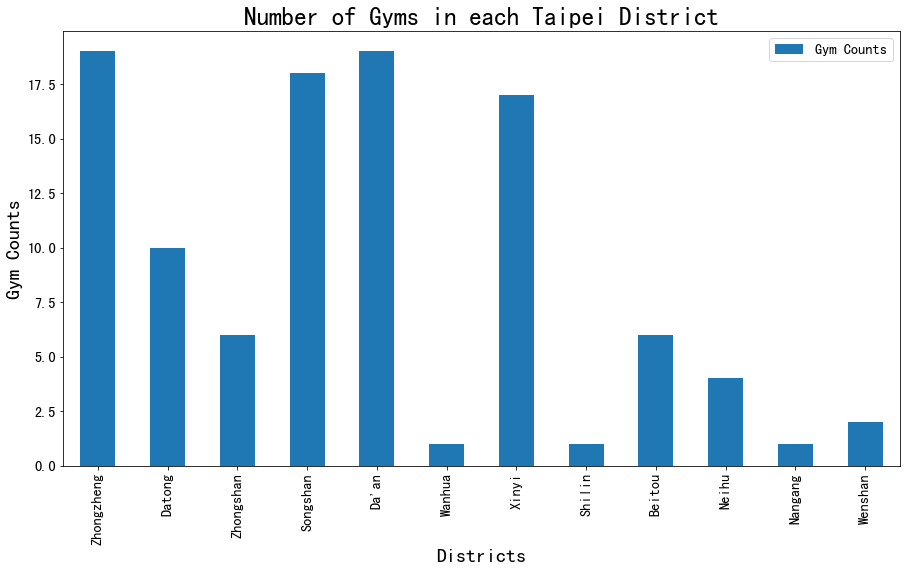

In [35]:
import matplotlib.pylab as pylab

df.plot(kind='bar', x='District Name', y='Gym Counts',figsize = (15,8))

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

pylab.rcParams.update(params)

plt.xlabel('Districts',fontsize=20)
plt.ylabel('Gym Counts',fontsize=20)
plt.title('Number of Gyms in each Taipei District',fontsize=25)
plt.show()


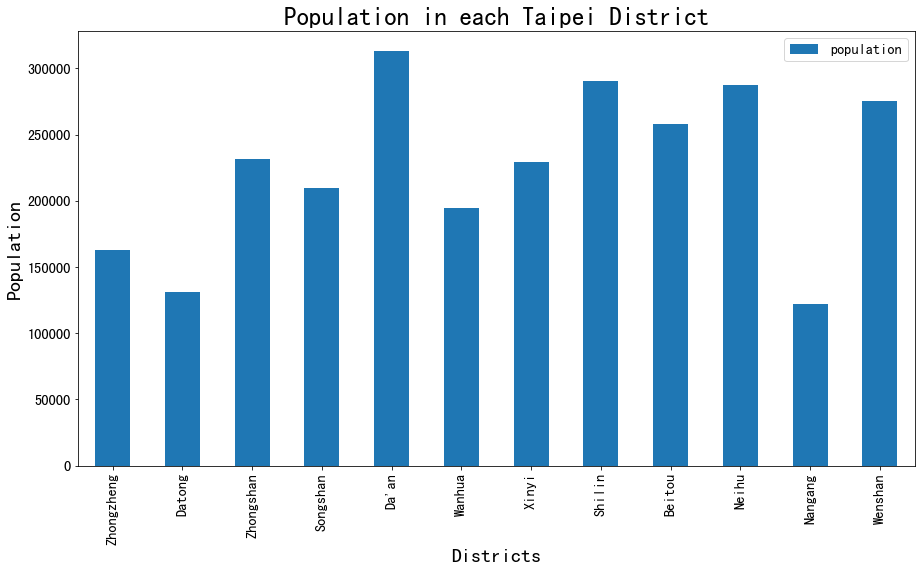

In [37]:
df.plot(kind='bar', x='District Name', y='population',figsize = (15,8))

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

pylab.rcParams.update(params)

plt.xlabel('Districts',fontsize=20)
plt.ylabel('Population',fontsize=20)
plt.title('Population in each Taipei District',fontsize=25)
plt.show()